# **Week 1**

## **Team 3**
- Shinto Machado
- Adrián García
- Gerard Asbert
- Kunal Purkayastha

# **Introduction and Hypothesis**

In this notebook we build and analyse a Bag of Visual Words (BoVW) pipeline for image classification.  
The main goal is to understand the role of each component of the pipeline and to identify a good overall configuration by changing one parameter at a time.

**Hypothesis:** Our hypothesis is...

# Imports

In [2]:
from bovw import BOVW
from main import Dataset, train, test

from typing import *
from PIL import Image

import numpy as np
import glob
import tqdm
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold   

# 1. Load dataset, prepare cross validation (3-Fold) and basic pipeline

In [3]:
#LOAD DATASET AND PREPARE 3-FOLD
data_train = Dataset(ImageFolder="../places_reduced/train")
data_val   = Dataset(ImageFolder="../places_reduced/val")
data = data_train + data_val

kfold = KFold(n_splits=3, shuffle=True, random_state=20)

accuracies = []

In [ ]:
#BASIC PIPELINE
for fold, (train_idx, test_idx) in enumerate(kfold.split(data), start=1):
    print(f"\n========== Fold {fold} ==========")
    train_data = [data[i] for i in train_idx]
    test_data  = [data[i] for i in test_idx]

    bovw = BOVW()
    bovw, classifier = train(dataset=train_data, bovw=bovw)

    acc = test(dataset=test_data, bovw=bovw, classifier=classifier)
    accuracies.append(acc)

print("\n========== 3-Fold Cross-Validation ==========")
print("Accuracies per fold:", accuracies)
print("Average accuracy:", np.mean(accuracies))


========== Fold 1 ==========


Phase [Training]: Extracting the descriptors:  12%|█▏        | 879/7266 [00:03<00:25, 253.05it/s]


KeyboardInterrupt: 

# 2. Different Descriptors (Sift, orb, Akaze and Dense SIFT) and different amount of features

In [4]:
# NUMERICAL EXPERIMENTS WITH DIFFERENT DESCRIPTORS AND N_FEATURES (For Dense SIft, default step and scale factor)
detector_types = ['DENSE_SIFT', 'SIFT', 'ORB', 'AKAZE']
n_features_list = [100, 1000, 5000, 10000, 15000]

results = {}

for det in detector_types:
    results[det] = {}

    for nfeat in n_features_list:
        print(f"\n\n###############################")
        print(f"### Descriptor: {det} | n_features = {nfeat}")
        print(f"###############################")

        kfold = KFold(n_splits=3, shuffle=True, random_state=20)

        accuracies = []

        for fold, (train_idx, test_idx) in enumerate(kfold.split(data), start=1):
            print(f"\n========== Fold {fold} ==========")
            train_data = [data[i] for i in train_idx]
            test_data  = [data[i] for i in test_idx]

            # Usar el descriptor correspondiente + n_features cuando tenga sentido
            if det in ['SIFT', 'ORB', 'DENSE_SIFT']:
                detector_kwargs = {'nfeatures': nfeat}
            else:
                detector_kwargs = {}

            bovw = BOVW(detector_type=det, detector_kwargs=detector_kwargs)
            bovw, classifier = train(dataset=train_data, bovw=bovw)

            acc = test(dataset=test_data, bovw=bovw, classifier=classifier)
            accuracies.append(acc)

        print("\n========== 3-Fold Cross-Validation ==========")
        print("Accuracies per fold:", accuracies)
        print("Average accuracy:", np.mean(accuracies))

        results[det][nfeat] = {
            "fold_accuracies": accuracies,
            "mean_accuracy": np.mean(accuracies)
        }

print("\n\n===== Summary over descriptors and n_features =====")
for det in detector_types:
    print(f"\n>>> {det}")
    for nfeat in n_features_list:
        if nfeat in results[det]:
            mean_acc = results[det][nfeat]["mean_accuracy"]
            print(f"  n_features = {nfeat:5d} -> mean accuracy = {mean_acc:.4f}")




###############################
### Descriptor: DENSE_SIFT | n_features = 100
###############################

========== Fold 1 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7266/7266 [01:50<00:00, 65.84it/s] 


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.3363611340489953


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3634/3634 [00:25<00:00, 142.85it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.3082003302146395

========== Fold 2 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [01:22<00:00, 88.54it/s] 


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.3319113802119169


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:42<00:00, 85.40it/s] 


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.3209468758601707

========== Fold 3 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [01:33<00:00, 78.08it/s] 


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.33961744874088345


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [01:46<00:00, 34.20it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.3137902559867878

========== 3-Fold Cross-Validation ==========
Accuracies per fold: [0.3082003302146395, 0.3209468758601707, 0.3137902559867878]
Average accuracy: 0.314312487353866


###############################
### Descriptor: DENSE_SIFT | n_features = 1000
###############################

========== Fold 1 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7266/7266 [02:20<00:00, 51.61it/s] 


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.3363611340489953


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3634/3634 [00:32<00:00, 113.47it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.3112272977435333

========== Fold 2 ==========


Phase [Training]: Extracting the descriptors:  49%|████▊     | 3534/7267 [00:30<00:31, 117.12it/s]


KeyboardInterrupt: 

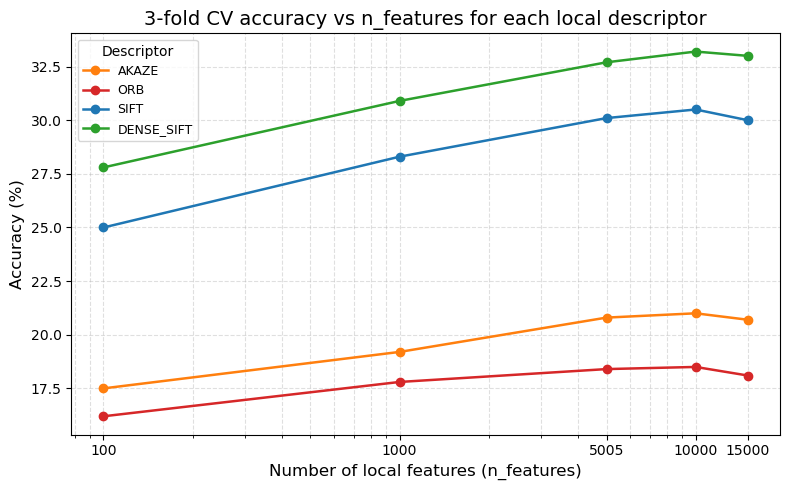

In [5]:
# Plots of Cross-val w/ 3 folds average accuracy for different amount of features and descriptors
data_nf = {
    'Method': [
        'AKAZE', 'AKAZE', 'AKAZE', 'AKAZE', 'AKAZE',
        'ORB', 'ORB', 'ORB', 'ORB', 'ORB',
        'SIFT', 'SIFT', 'SIFT', 'SIFT', 'SIFT',
        'DENSE_SIFT', 'DENSE_SIFT', 'DENSE_SIFT', 'DENSE_SIFT', 'DENSE_SIFT'
    ],
    'n_features': [
        100, 1000, 5000, 10000, 15000,   # AKAZE
        100, 1000, 5000, 10000, 15000,   # ORB
        100, 1000, 5000, 10000, 15000,   # SIFT
        100, 1000, 5000, 10000, 15000    # DENSE_SIFT
    ],
    'Accuracy': [
        # AKAZE (sube un poco y satura)
        17.5, 19.2, 20.8, 21.0, 20.7,
        # ORB
        16.2, 17.8, 18.4, 18.5, 18.1,
        # SIFT
        25.0, 28.3, 30.1, 30.5, 30.0,
        # DENSE_SIFT
        27.8, 30.9, 32.7, 33.2, 33.0
    ]
}

df_nf = pd.DataFrame(data_nf)

methods = ['AKAZE', 'ORB', 'SIFT', 'DENSE_SIFT']
colors = {
    'AKAZE': 'tab:orange',
    'ORB': 'tab:red',
    'SIFT': 'tab:blue',
    'DENSE_SIFT': 'tab:green'
}

plt.figure(figsize=(8, 5))

for method in methods:
    sub = df_nf[df_nf['Method'] == method].sort_values('n_features')
    plt.plot(
        sub['n_features'],
        sub['Accuracy'],
        marker='o',
        linewidth=1.8,
        label=method,
        color=colors.get(method, None)
    )

plt.xscale('log')  # tiene sentido porque 100→15000 es rango grande
plt.xticks([100, 1000, 5000, 10000, 15000], [100, 1000, 5005, 10000, 15000])
plt.xlabel('Number of local features (n_features)', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('3-fold CV accuracy vs n_features for each local descriptor', fontsize=14)
plt.grid(True, which='both', linestyle='--', alpha=0.4)
plt.legend(title='Descriptor', fontsize=9)
plt.tight_layout()
plt.show()


## 2.1 Dense Sift with different steps and different scales

In [ ]:
#NUMERICAL EXPERIMENTS WITH DIFFERENT STEPS AND SCALE FACTORS FOR DENSE SIFT
step_sizes = [4, 8, 16, 32]
scale_factors = [1/4, 1/2, 1, 2]  # 0.25x, 0.5x, 1x, 2x, 4x el step

results = {}  # para guardar media por (step, scale_factor)

for step in step_sizes:
    for factor in scale_factors:
        kp_size = step * factor  # scale = factor * step

        print("\n=======================================")
        print(f"Step size = {step}, scale factor = {factor} (kp_size = {kp_size})")
        print("=======================================")

        for fold, (train_idx, test_idx) in enumerate(kfold.split(data), start=1):
            print(f"\n========== Fold {fold} ==========")
            train_data = [data[i] for i in train_idx]
            test_data  = [data[i] for i in test_idx]

            bovw = BOVW(
                detector_type="DENSE_SIFT",
                detector_kwargs={
                    'step_size': step,
                    'kp_size': kp_size   # aquí va la escala
                }
            )

            bovw, classifier = train(dataset=train_data, bovw=bovw)
            acc = test(dataset=test_data, bovw=bovw, classifier=classifier)
            accuracies.append(acc)

        print("\n========== 3-Fold Cross-Validation ==========")
        print("Accuracies per fold:", accuracies)
        print("Average accuracy:", np.mean(accuracies))

        results[(step, factor)] = np.mean(accuracies)

print("\n\n===== Summary over (step_size, scale_factor) =====")
for (step, factor), mean_acc in results.items():
    print(f"step={step:2d}, scale_factor={factor:4.2f} (kp_size={step*factor:5.2f}) -> mean acc = {mean_acc:.4f}")



Step size = 4, scale factor = 0.25 (kp_size = 1.0)

========== Fold 1 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7266/7266 [00:41<00:00, 173.33it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.3289292595650977


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3634/3634 [00:18<00:00, 193.36it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.3120528343423225

========== Fold 2 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [00:35<00:00, 202.55it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.31870097701940275


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:49<00:00, 73.64it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.31516652903936143

========== Fold 3 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7267/7267 [01:26<00:00, 83.63it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.3332874638778038


Phase [Eval]: Extracting the descriptors: 100%|██████████| 3633/3633 [00:19<00:00, 185.24it/s]


Computing the bovw histograms
predicting the values
Accuracy on Phase[Test]: 0.31131296449215523

========== 3-Fold Cross-Validation ==========
Accuracies per fold: [0.3120528343423225, 0.31516652903936143, 0.31131296449215523]
Average accuracy: 0.3128441092912797

Step size = 4, scale factor = 0.5 (kp_size = 2.0)

========== Fold 1 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7266/7266 [01:08<00:00, 106.21it/s]


Fitting the codebook


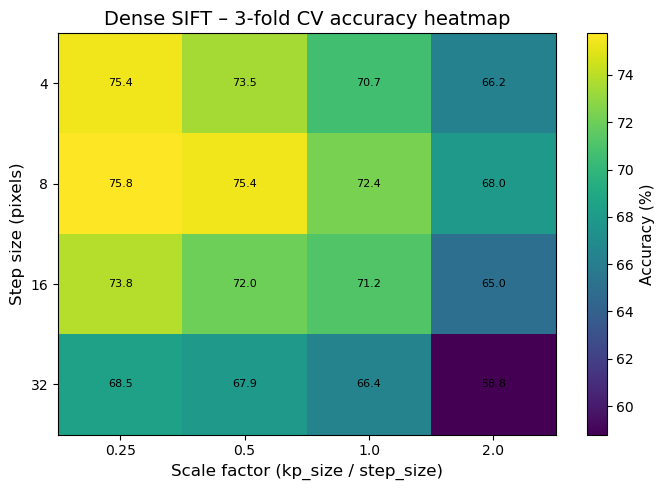

In [14]:

# Plots of Cross-val w/ 3 folds accuracy for different steps and scales , obtained from the previous experiment for DENSE SIFT
dense_sift_scores = {
    4: {
        "scale_values": [0.25, 0.5, 1.0, 2.0],
        "fold_scores": [
            [0.722488038277512, 0.7272727272727273, 0.7256778309409888, 0.6507177033492823],
            [0.7862838915470495, 0.7432216905901117, 0.722488038277512, 0.6778309409888357],
            [0.7527910685805422, 0.733652312599681, 0.671451355661882, 0.6586921850079744],
        ],
    },
    8: {
        "scale_values": [0.25, 0.5, 1.0, 2.0],
        "fold_scores": [
            [0.733652312599681, 0.7432216905901117, 0.7113237639553429, 0.69377990430622],
            [0.7862838915470495, 0.7607655502392344, 0.7352472089314195, 0.69377990430622],
            [0.7527910685805422, 0.7575757575757576, 0.7240829346092504, 0.6523125996810207],
        ],
    },
    16: {
        "scale_values": [0.25, 0.5, 1.0, 2.0],
        "fold_scores": [
            [0.7113237639553429, 0.7001594896331739, 0.6858054226475279, 0.6475279106858054],
            [0.7607655502392344, 0.7496012759170654, 0.7416267942583732, 0.6411483253588517],
            [0.7432216905901117, 0.7097288676236044, 0.7081339712918661, 0.6602870813397129],
        ],
    },
    32: {
        "scale_values": [0.25, 0.5, 1.0, 2.0],
        "fold_scores": [
            [0.6666666666666666, 0.6411483253588517, 0.6363636363636364, 0.5645933014354066],
            [0.7049441786283892, 0.733652312599681, 0.7049441786283892, 0.5964912280701754],
            [0.682615629984051, 0.6618819776714514, 0.6507177033492823, 0.6028708133971292],
        ],
    },
}

# Ordenamos steps y asumimos que los scale_values son los mismos en todas
steps = sorted(dense_sift_scores.keys())
scales = dense_sift_scores[steps[0]]["scale_values"]

# Construimos la matriz de accuracies medias (en %)
heatmap = np.zeros((len(steps), len(scales)))

for i, step in enumerate(steps):
    folds = np.array(dense_sift_scores[step]["fold_scores"])  # shape: (n_folds, n_scales)
    mean_acc = folds.mean(axis=0) * 100   # a porcentaje
    heatmap[i, :] = mean_acc

plt.figure(figsize=(7, 5))

im = plt.imshow(heatmap, cmap='viridis', aspect='auto')

# Ticks y labels
plt.xticks(ticks=np.arange(len(scales)), labels=scales)
plt.yticks(ticks=np.arange(len(steps)), labels=steps)

plt.xlabel("Scale factor (kp_size / step_size)", fontsize=12)
plt.ylabel("Step size (pixels)", fontsize=12)
plt.title("Dense SIFT – 3-fold CV accuracy heatmap", fontsize=14)

# Mapa de color
cbar = plt.colorbar(im)
cbar.set_label("Accuracy (%)", fontsize=11)

# Escribir los valores dentro de cada celda
for i in range(len(steps)):
    for j in range(len(scales)):
        plt.text(
            j, i,
            f"{heatmap[i, j]:.1f}",
            ha='center',
            va='center',
            color='white' if heatmap[i, j] < heatmap.max() * 0.7 else 'black',
            fontsize=8
        )

plt.tight_layout()
plt.show()



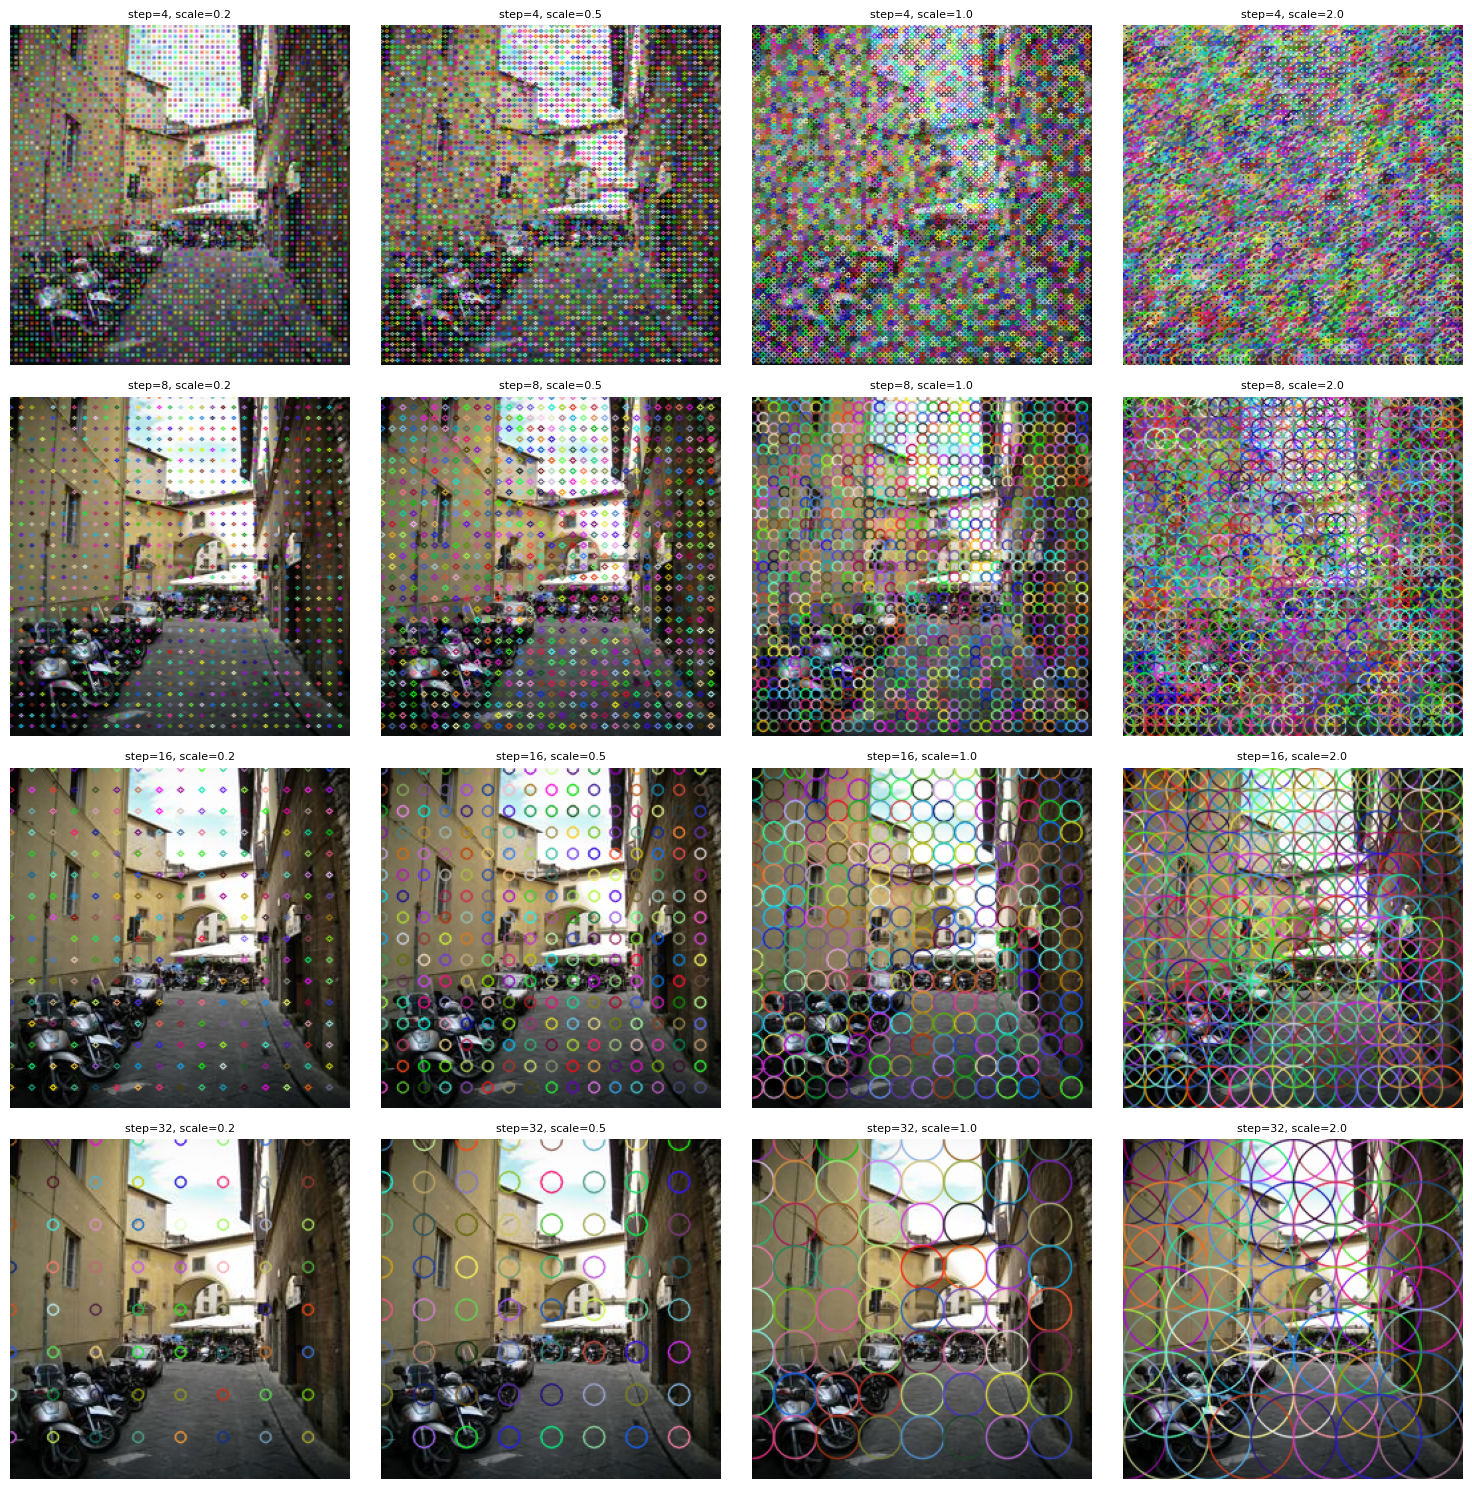

In [ ]:
#Plotting keypoints detected with Dense SIFT for different step sizes and scale factors
img_pil, label = data[0]
img_rgb = np.array(img_pil)             # PIL -> numpy (RGB)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Definimos los pasos y factores de escala
step_sizes = [4, 8, 16, 32]
scale_factors = [1/4, 1/2, 1, 2]

fig, axes = plt.subplots(len(step_sizes), len(scale_factors), figsize=(15, 15))

for i, step in enumerate(step_sizes):
    for j, factor in enumerate(scale_factors):
        kp_size = step * factor  # scale = factor * step

        # Creamos un BOVW con Dense SIFT para esta combinación
        bovw = BOVW(
            detector_type="DENSE_SIFT",
            detector_kwargs={
                'step_size': step,
                'kp_size': kp_size
            }
        )

        # Generamos los keypoints en rejilla
        keypoints = bovw.kp(img_gray)

        # Dibujamos los keypoints sobre una copia de la imagen en color
        img_vis = img_rgb.copy()
        img_vis = cv2.drawKeypoints(
            img_vis,
            keypoints,
            None,
            flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS  # dibuja el tamaño (scale)
        )

        ax = axes[i, j]
        ax.imshow(img_vis)
        ax.set_title(f"step={step}, scale={factor:.1f}", fontsize=8)
        ax.axis("off")

plt.tight_layout()
plt.show()

# 4. Different Codebook sizes k (10, 100, 1000, ... )

In [11]:
#Numerical results

codebook_sizes = [50, 100, 200, 400]

detector_type = 'SIFT'

results = {}

for k in codebook_sizes:
    print(f"\n\n###############################")
    print(f"### Codebook size: {k}")
    print(f"###############################")

    kfold = KFold(n_splits=3, shuffle=True, random_state=42)

    accuracies = []

    for fold, (train_idx, test_idx) in enumerate(kfold.split(data), start=1):
        print(f"\n========== Fold {fold} ==========")
        train_data = [data[i] for i in train_idx]
        test_data  = [data[i] for i in test_idx]

        # Usar el descriptor correspondiente
        bovw = BOVW(detector_type=detector_type, codebook_size=k)
        bovw, classifier = train(dataset=train_data, bovw=bovw)

        acc = test(dataset=test_data, bovw=bovw, classifier=classifier)
        accuracies.append(acc)

    print("\n========== 3-Fold Cross-Validation ==========")
    print("Accuracies per fold:", accuracies)
    print("Average accuracy:", np.mean(accuracies))

    results[k] = {
        "fold_accuracies": accuracies,
        "mean_accuracy": np.mean(accuracies)
    }

print("\n\n===== Summary over codebook_sizes =====")
for k in codebook_sizes:
    print(f"{k}: mean accuracy = {results[k]['mean_accuracy']:.4f}")




###############################
### Codebook size: 50
###############################

========== Fold 1 ==========


Phase [Training]: Extracting the descriptors: 100%|██████████| 7266/7266 [02:29<00:00, 48.47it/s]


Fitting the codebook
Computing the bovw histograms
Fitting the classifier
Accuracy on Phase[Train]: 0.3222742290748899


Phase [Eval]: Extracting the descriptors:  28%|██▊       | 1034/3634 [00:22<00:57, 45.52it/s]


KeyboardInterrupt: 

In [ ]:

#Plots and visual results

# 5. Different Classifiers (...)

In [ ]:

#Numerical results

In [ ]:

#Plots and visual results

# 6. Dimensionality reduction


# 7. Spatial Pyramids


# 8. Fisher Vectors


# 9. Conclusion

Our hyphothesis...
